## EDA
### Revenue & Financial Impact Analysis

In [144]:
## Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [145]:
## Load the cleaned data
df = pd.read_csv("../data/processed/cleaned_telco_customer_churn.csv")

print(df.shape)
df.head()

(7021, 20)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### 1. What is the average monthly revenue of churned vs retained customers?

In [146]:
churn_wise_avg_monthly_revenue = df.groupby(['Churn'])['MonthlyCharges'].mean().round(2).reset_index()
churn_wise_avg_monthly_revenue.columns = ['churn_status', 'monthly_revenue'] 
churn_wise_avg_monthly_revenue

,churn_status,monthly_revenue
0,No,61.27
1,Yes,74.43


<Figure size 640x480 with 0 Axes>

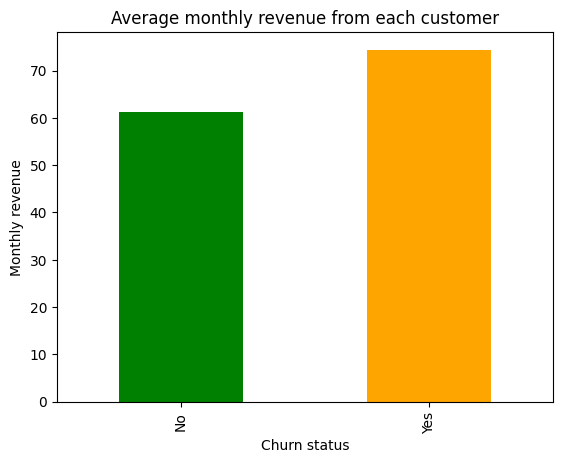

In [147]:
## Visualize
plt.figure()
churn_wise_avg_monthly_revenue.plot(
    kind='bar', 
    x='churn_status', 
    y='monthly_revenue',
    color=['g', 'orange'],
    xlabel='Churn status',
    ylabel='Monthly revenue',
    legend=False
    )
plt.title("Average monthly revenue from each customer")
plt.show()

#### Comment:
The above analysis interprets that the average monthly revenue from churned customers is high (approximately $74.43) than the existing customers (which is $61.27). So, it is the warning message for the business.

### 2. Which churned customers represent the highest revenue loss?

**Customers who have been churned and have the highest TotalCharges (= MonthlyCharges*tenure) represent the highest revenue loss.**

<br/>

We will segment customers into groups with following rules:

**1. Contract Type (Categorical Segmentation)**

* Month-to-Month
* One-Year
* Two-Year 


**2. Tenure (Lifecycle Segmentation)**

* 0–6 months → Onboarding
* 6–12 months → Early engagement
* 12–24 months → Established
* 24+ months → Loyal

**3. Internet Service Type (Product Segmentation)**

* Fiber optic
* DSL
* No internet service

**4. Number of Services (Engagement Segmentation)**

* 0–1 services → Low engagement
* 2–3 services → Medium engagement
* 4+ services → High engagement

In [148]:
## Churned customers
churned_df = (df[df['Churn']=='Yes']).sort_values(by='TotalCharges', ascending=False)
churned_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4592,Male,0,Yes,No,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),117.80,8684.80,Yes
1292,Female,0,No,No,70,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,One year,No,Credit card (automatic),115.55,8127.60,Yes
3873,Female,0,Yes,No,72,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,109.25,8109.80,Yes
6518,Male,0,Yes,No,70,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,One year,No,Credit card (automatic),115.65,7968.85,Yes
5562,Male,0,Yes,Yes,68,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,113.15,7856.00,Yes


#### Comment: 
The first customer of the above table represent the highest revenue lost with total charges $8684.80.

But we should not focus on a single customer, we should focus on customer segment to develop business strategy.

In [149]:
## Feature Engineering to segment customers
additional_services = ['PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
for service in additional_services:
    df[service]=df[service].map(lambda x: 1 if x=='Yes' else 0)

df['TotalServices'] = df[additional_services].sum(axis=1)

## Tenure segmentation
df['tenure'] = pd.cut(
    df['tenure'],
    bins=[0,6,12,24,100],
    labels=['0-6','6-12','12-24','24+'],
    right=True 
    )

## Number of service segmentation
df['TotalServices'] = pd.cut(
    df['TotalServices'],
    bins=[0,1,3,10],
    labels=['0-1','2-3','4+'],
    right=True 
    )

df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TotalServices
0,Female,0,Yes,No,0-6,0,0,DSL,0,1,...,0,0,0,Month-to-month,Yes,Electronic check,29.85,29.85,No,0-1
1,Male,0,No,No,24+,1,0,DSL,1,0,...,0,0,0,One year,No,Mailed check,56.95,1889.50,No,2-3
2,Male,0,No,No,0-6,1,0,DSL,1,1,...,0,0,0,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,2-3
3,Male,0,No,No,24+,0,0,DSL,1,0,...,1,0,0,One year,No,Bank transfer (automatic),42.30,1840.75,No,2-3
4,Female,0,No,No,0-6,1,0,Fiber optic,0,0,...,0,0,0,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0-1


In [150]:
churned_df = (df[df['Churn']=='Yes']).sort_values(by='TotalCharges', ascending=False)

## Which churned customers represent the highest revenue loss?
segment_cols = ['tenure', 'Contract', 'InternetService', 'TotalServices']
segment_wise_revenue_loss = (churned_df
                             .groupby(by=segment_cols, observed=False)['TotalCharges']
                             .agg( ['sum', 'count'])
                             .reset_index()
                             )
segment_wise_revenue_loss.columns = segment_cols + ['RevenueLoss', 'Customers']
segment_wise_revenue_loss.sort_values(by='RevenueLoss', ascending=False, inplace=True)
segment_wise_revenue_loss

,tenure,Contract,InternetService,TotalServices,RevenueLoss,Customers
86,24+,Month-to-month,Fiber optic,4+,885121.25,212
95,24+,One year,Fiber optic,4+,511718.90,90
85,24+,Month-to-month,Fiber optic,2-3,240752.90,82
59,12-24,Month-to-month,Fiber optic,4+,204359.75,117
104,24+,Two year,Fiber optic,4+,200319.40,30
...,...,...,...,...,...,...
76,12-24,Two year,Fiber optic,2-3,0.00,0
99,24+,Two year,DSL,0-1,0.00,0
98,24+,One year,No,4+,0.00,0
102,24+,Two year,Fiber optic,0-1,0.00,0


In [151]:
## Calculate revenue loss percentage of each group over total revenue and churned customer percentage over all churned customers
segment_wise_revenue_loss['RevenueLossPercentage'] = ((segment_wise_revenue_loss['RevenueLoss']/segment_wise_revenue_loss['RevenueLoss'].sum())*100).round(2)
segment_wise_revenue_loss['CustomersPercentage'] = ((segment_wise_revenue_loss['Customers']/segment_wise_revenue_loss['Customers'].sum())*100).round(2)
segment_wise_revenue_loss

,tenure,Contract,InternetService,TotalServices,RevenueLoss,Customers,RevenueLossPercentage,CustomersPercentage
86,24+,Month-to-month,Fiber optic,4+,885121.25,212,31.00,11.58
95,24+,One year,Fiber optic,4+,511718.90,90,17.92,4.92
85,24+,Month-to-month,Fiber optic,2-3,240752.90,82,8.43,4.48
59,12-24,Month-to-month,Fiber optic,4+,204359.75,117,7.16,6.39
104,24+,Two year,Fiber optic,4+,200319.40,30,7.02,1.64
...,...,...,...,...,...,...,...,...
76,12-24,Two year,Fiber optic,2-3,0.00,0,0.00,0.00
99,24+,Two year,DSL,0-1,0.00,0,0.00,0.00
98,24+,One year,No,4+,0.00,0,0.00,0.00
102,24+,Two year,Fiber optic,0-1,0.00,0,0.00,0.00


In [152]:
## Top 5 groups of churned customers with highest revenue loss
top5_group = segment_wise_revenue_loss.head().reset_index(drop=True)
top5_group

,tenure,Contract,InternetService,TotalServices,RevenueLoss,Customers,RevenueLossPercentage,CustomersPercentage
0,24+,Month-to-month,Fiber optic,4+,885121.25,212,31.00,11.58
1,24+,One year,Fiber optic,4+,511718.90,90,17.92,4.92
2,24+,Month-to-month,Fiber optic,2-3,240752.90,82,8.43,4.48
3,12-24,Month-to-month,Fiber optic,4+,204359.75,117,7.16,6.39
4,24+,Two year,Fiber optic,4+,200319.40,30,7.02,1.64


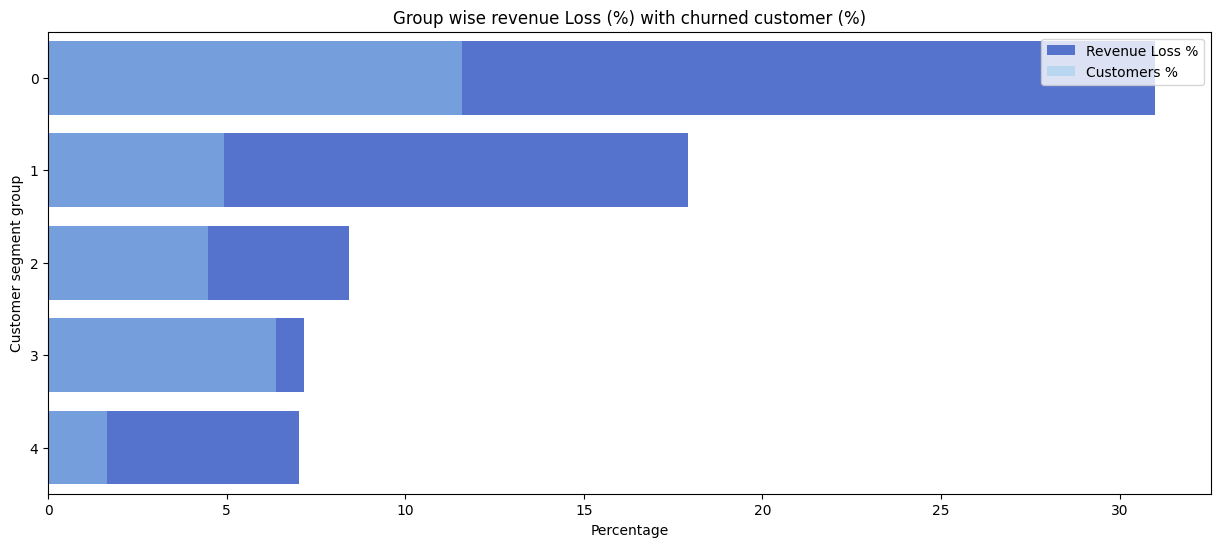

In [153]:
## Visualize loss percentage with customer percentage
plt.figure(figsize=(15,6))
sns.barplot(data=top5_group, y=np.arange(0,5), x='RevenueLossPercentage', orient='h', label='Revenue Loss %', color='royalblue')
sns.barplot(data=top5_group, y=np.arange(0,5), x='CustomersPercentage', orient='h',  alpha=0.5, label='Customers %', color='lightskyblue')
plt.title("Group wise revenue Loss (%) with churned customer (%)")
plt.xlabel('Percentage')
plt.ylabel('Customer segment group')
plt.legend(loc='upper right')
plt.show()

#### Comment:
This analysis provides a clear picture of percentage revenue loss among each group of total revenue loss with churned customer's percentage who contributes to these losses.

This first group of customers (**tenure: 24+,	Contract: Month-to-month,	InternetService: Fiber optic,	TotalServices: 4+**) contributes in highest revenue loss and that is **11.58%** of total revenue loss and this contribution is done by **11.38** churned customers out of 100 churned customers.

### 3. How much total monthly revenue is lost due to churn?

In [154]:
churned_df['MonthlyCharges'].sum().round(2)

np.float64(138887.3)

#### Comment:
Total monthly revenue is lost due to churn is $138887.30

### 4. Which customer segments are high revenue but high churn?

Segment the customers based on total charges.

**Total Charges (Value-Based Segmentation)**

* Low: Bottom 25%
* Medium: Middle 50%
* High: Top 25%

In [155]:
## Segement customers based on monthly charges
df['TotalRevenue'] = pd.qcut(
    df['TotalCharges'],
    q=[0,0.25,0.75,1.0],
    labels=['low','medium','high'],
    )

df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TotalServices,TotalRevenue
0,Female,0,Yes,No,0-6,0,0,DSL,0,1,...,0,0,Month-to-month,Yes,Electronic check,29.85,29.85,No,0-1,low
1,Male,0,No,No,24+,1,0,DSL,1,0,...,0,0,One year,No,Mailed check,56.95,1889.50,No,2-3,medium
2,Male,0,No,No,0-6,1,0,DSL,1,1,...,0,0,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,2-3,low
3,Male,0,No,No,24+,0,0,DSL,1,0,...,0,0,One year,No,Bank transfer (automatic),42.30,1840.75,No,2-3,medium
4,Female,0,No,No,0-6,1,0,Fiber optic,0,0,...,0,0,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0-1,low


In [162]:
## Which segments represent the highest revenue but highest churned?
segment_cols = ['tenure', 'Contract', 'InternetService', 'TotalServices', 'TotalRevenue']
high_churn_high_revenue = (df
                             .groupby(by=segment_cols, observed=False)
                             .agg({'Churn':[lambda x: ((x=='Yes').mean()*100).round(), 'count'], 'TotalCharges': ['sum']})
                             .reset_index()
                             )

high_churn_high_revenue.columns = high_churn_high_revenue.columns.droplevel(1)
high_churn_high_revenue.columns = ['tenure', 'Contract', 'InternetService', 'TotalServices','TotalRevenue', 'ChurnRate', 'Customers', 'TotalCharges']
high_churn_high_revenue.sort_values(by=['TotalCharges'], ascending=False, inplace=True, ignore_index=True)
high_churn_high_revenue

,tenure,Contract,InternetService,TotalServices,TotalRevenue,ChurnRate,Customers,TotalCharges
0,24+,Two year,Fiber optic,4+,high,7.0,404,2826086.00
1,24+,One year,Fiber optic,4+,high,20.0,404,2389535.60
2,24+,Two year,DSL,4+,high,2.0,397,2076839.35
3,24+,Month-to-month,Fiber optic,4+,high,34.0,332,1757407.00
4,24+,Month-to-month,Fiber optic,4+,medium,43.0,229,702084.00
...,...,...,...,...,...,...,...,...
319,0-6,Two year,Fiber optic,0-1,medium,NaN,0,0.00
320,24+,Two year,No,0-1,high,NaN,0,0.00
321,24+,Two year,Fiber optic,4+,low,NaN,0,0.00
322,24+,Two year,No,4+,high,NaN,0,0.00


### Which segments represent the highest revenue but highest churned?
#### Rules to select this group:
| Filter     | Rule                |
| ---------- | ------------------- |
| Churn rate    |  ≥ 30%            |
| Customers  | ≥ 100               |
| TotalRevenue | High        |


In [164]:
filtered_high_churn_high_revenue = high_churn_high_revenue.query("ChurnRate >= 30 & Customers >= 100 & TotalRevenue == 'high'")
filtered_high_churn_high_revenue

,tenure,Contract,InternetService,TotalServices,TotalRevenue,ChurnRate,Customers,TotalCharges
3,24+,Month-to-month,Fiber optic,4+,high,34.0,332,1757407.0


#### Comment:
From the above table we can conclude that the high revenue but high churned group is **group 0** (**tenure: 24+,	Contract: Month-to-month,	InternetService: Fiber optic,	TotalServices: 4+**) with total charges **high** and rate of churned customers **34%**.

### 5. What % of revenue comes from customers of this group?

In [165]:
## Revenue % of this group
((filtered_high_churn_high_revenue['TotalCharges']/df['TotalCharges'].sum())*100).round(2)

3    10.97
Name: TotalCharges, dtype: float64

#### Comment:
The total % of revenue comes from this group is **10.97%**

---
### 👨‍💻 Author Information
**Name:** [Amaresh Maity]  
**Date:** 2026-01-09  
**Role:** [Data Scientist | AI Engineer]



#### Let's Connect!

If you have questions about this analysis or would like to collaborate, feel free to reach out:

* **LinkedIn:** [LinkedIn](https://www.linkedin.com/in/amareshmaity/)
* **GitHub:** [@amareshmaity](https://github.com/amareshmaity)
* **Email:** [contacttoamaresh@gmail.com](mailto:contacttoamaresh@gmail.com)